# Assigment 1

## The assignment is divided into programming and mathematical questions. Both of them are given in this notebook.

## Programming questions: I am giving you a template that you can use to write your code. Description of the questions is integrated in the comments.

## Upload your code on Learn dropbox and submit pdfs of the code and answers to the mathematical questions on Crowdmark.

## -----------------------------------------------------------------------------------------------------------

## Programming Questions

## Load modules

In [8]:
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage import data
from skimage.transform import resize

# Numpy is useful for handling arrays and dense matrices (a matrix with a lot of nonzeros).
import numpy as np

## Load image

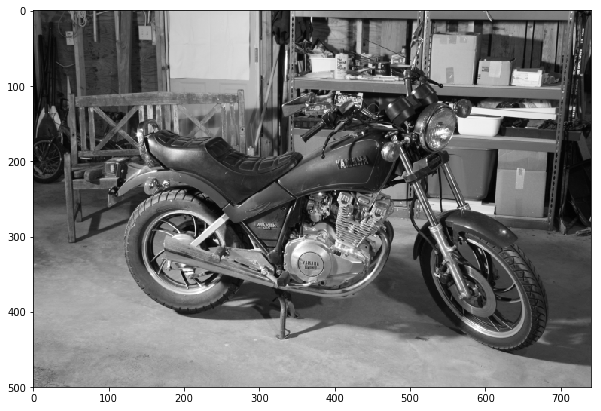

In [3]:
img = data.stereo_motorcycle()[0]
img = rgb2gray(img)*255 # convert to gray and change scale from (0,1) to (0,255).

m = img.shape[0]
n = img.shape[1]

plt.figure(1, figsize=(10, 10))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

## Question 1: compute the differences operators here. Note that the image is not a square image. Marks: 10/100

In [4]:
# You will need these three methods to construct the sparse differences operators.
# If you do not use sparse operators you might have memory problems.
from scipy.sparse import diags
from scipy.sparse import kron
from scipy.sparse import identity

# Start coding here.

# Observation: 
# The operators must take (m*n)x(m*n) shape to be compatible with the dimension of vectorized image.
# The J takes the #columns (n) as dimension, while the I takes #rows (m) as dimension

J = diags(diagonals=[
    [-1.0] * n,
    [1.0] * (n-1)
], offsets=[0, 1])

I = identity(n=m)

# Forward Horizontal Difference
D_h = kron(J, I)

# Forward Vertical Difference
D_v = kron(I, J)

## Question 2: visualize the differences operators applied on the image. Marks: 5/100

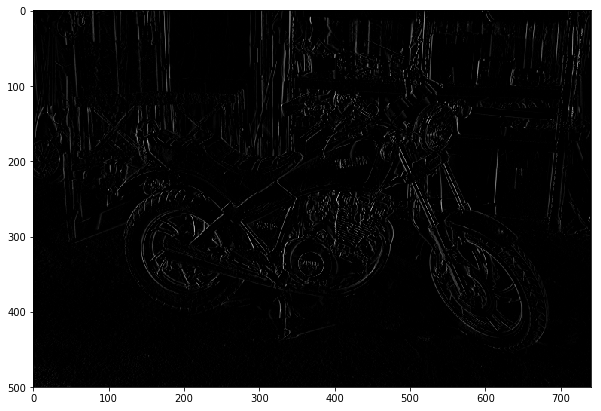

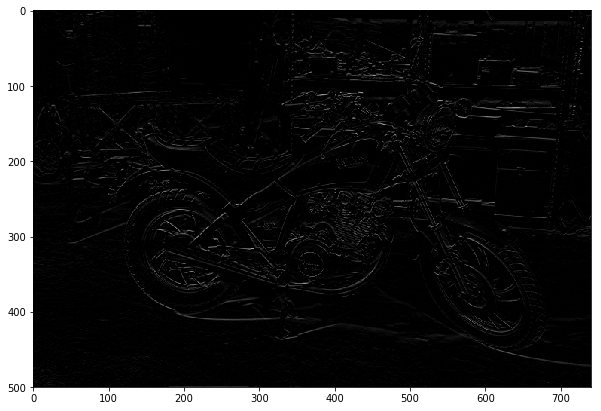

In [5]:
#Check the figures in the lecture notes on piazza to see an example of what the output should be like. 

# Start coding here.

# vectorize the image, column wise
img_vec = (img.T).ravel()

# apply D_h to the vectorized image and reshape back to original size
img_vec_h = D_h.dot(img_vec)
img_vec_h = img_vec_h.reshape((m, n), order='F')

# apply D_v to the vectorized image and reshape back to original size
img_vec_v = D_v.dot(img_vec)
img_vec_v = img_vec_v.reshape((m, n), order='F')

plt.figure(1, figsize=(10, 10))
plt.imshow(img_vec_h, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.figure(1, figsize=(10, 10))
plt.imshow(img_vec_v, cmap='gray', vmin=0, vmax=255)
plt.show()

## Add noise to the image

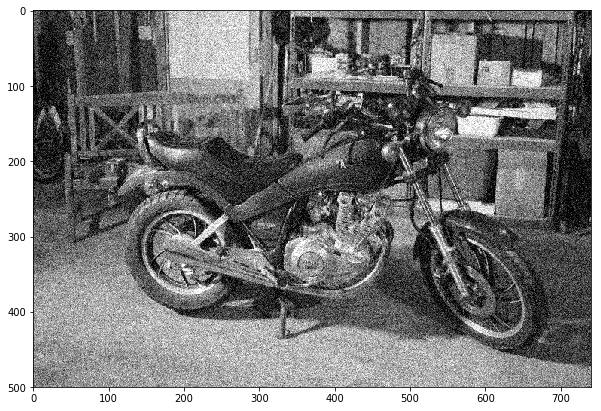

In [6]:
mean_ = 0
standard_deviation = 30
dimensions = (m,n)

noise = np.random.normal(mean_,standard_deviation,dimensions)

noisy_image = img + noise

plt.figure(1, figsize=(10, 10))
plt.imshow(noisy_image, cmap='gray', vmin=0, vmax=255)
plt.show()

## Quetion 3: Denoise the image. Marks: 20/100

In [ ]:
# This method can be used to solve linear systems.
from scipy.sparse.linalg import spsolve
# This module can be used to convert arrays and matrices from complex to real.
from scipy import real

# Use the following lambda list to tune the denoising problem.
lambda_list = [0.1, 3, 10]

# Start coding here. Check figures in Lecture to see an example of what the output should be like.

for lamb in lambda_list:
    D = D_h + 1j * D_v
    A = lamb * real((D.H).dot(D)) + identity(m*n)
    # Another implementation of A:
    # A = lamb * ((D_h.T).dot(D_h) + (D_v.T).dot(D_v)) + identity(m*n)
    b = (noisy_image.T).ravel()
    denoised_image = spsolve(A=A, b=b)
    denoised_image = denoised_image.reshape((m, n), order='F')
    plt.figure(1, figsize=(10, 10))
    plt.imshow(denoised_image, cmap='gray', vmin=0, vmax=255)
    plt.show()

# Non-programming questions

## Question 4: compute the gradient of the denoising objective function $f(x) = \frac{\lambda}{2}\|Dx\|_2^2 + \frac{1}{2}\|x-z_{noisy}\|_2^2$, where $x$ consists of $n$ coordinates. The gradient has already been given in the class and you are asked to analytically compute and show any steps for deriving the gradient. Marks: 20/100

First, we rewrite the objective function in matrix form:

Noting that $z_n^T.x = x^T.z_n$ for any two real vectors $x, z \in R^n$ , and $||v||_2^2 = v^*.v$, where $*$ is the conjugate transpose operation applied on a complex vector $v$ (which reduces to just a transpose operation for real vectors), and "$.$" is the dot product operqation.

$f(x)$ can be rewritten as:

$$ 
f(x)        = \frac{\lambda}{2}  (D.x)^*.(D.x) + \frac{1}{2} (x-z_n)^T.(x-z_n)\\
            = \frac{\lambda}{2}  (x^T.D^*).(D.x) + \frac{1}{2} (x^T-z_n^T).(x-z_n)\\
            = \frac{\lambda}{2}  (x^T.A.x) + \frac{1}{2} (x^T.x - 2x^T.z_n + z_n^T.z_n)
$$ 

Where $A = (D^*.D)$. We can see that $A$ is square matrix that also has the property $A^* = A$.

Using the following matrix differentiation rules:

- $\nabla (x^T.A.x) = (A^* + A).x = 2A.x$
- $\nabla (x^T.x) = 2x$
- $\nabla (z_n^T.x) = \nabla (x^T.z_n) = z_n$ where $z_n$ does not depend on $x$.

$\nabla f(x)$ (the gradient) can be obtained as:

$$ 
\nabla f(x)        = \frac{\lambda}{2}  (2A.x) + \frac{1}{2} (2x - 2z_n + 0) \\
                   = \lambda A.x + x - z_n \\
                   = [\lambda A + I]. x - z_n \\
                   = [\lambda (D^*.D) + I]. x - z_n
$$ 



## Question 5: compute the second derivative (Hessian matrix) of the denoising objective function $f(x) = \frac{\lambda}{2}\|Dx\|_2^2 + \frac{1}{2}\|x-z_{noisy}\|_2^2$, where $x$ consists of $n$ coordinates. The Hessian matrix has already been given in the class and you are asked to analytically compute and show any steps for deriving the gradient. Marks: 10/100

Starting from Question 4, we know that $\nabla f(x) = [\lambda (D^*.D) + I]. x - z_n$ 

Using the following matrix differentiation rule:
- $\nabla (A.x) = A$

$\nabla^2 f(x)$ (the Hessian) can be obtained as:

$$ 
\nabla^2 f(x) = \lambda (D^*.D) + I
$$ 

## Question 6: prove that the denoising objective function $f(x) = \frac{\lambda}{2}\|Dx\|_2^2 + \frac{1}{2}\|x-z_{noisy}\|_2^2$ is a convex function. Prove this without using the fact that the objective function is differentiable. Marks: 20/100

## Question 7: You are given a function $f$ that is twice differentiable and not necessarily convex. Explain why if a point $x$ that satisfies $\nabla f(x) = 0$ is not necessarily a local minimizer of function $f$. Hint: use the Taylor expansion $f(y)=f(x) + \nabla f(x)^T (y-x) + (y-x)^T \nabla^2 f(x) (y-x) + \mathcal{o}(\|y-x\|^2_2)$. Note that $\mathcal{o}$ denotes the little-o notation and $\mathcal{o}(\|y-x\|^2_2)$ can be intepreted as a function that goes to zero faster than $\|y-x\|^2_2$. Marks: 15/100

Counter Example:

Let $f(x) = x^3$ (not convex), we find that $\nabla f(x) = 3x^2$

Setting $\nabla f(x) = 0 \rightarrow x = 0$ is obviously not a local minimizer since $f(x=0) = 0$ and $f(x-\epsilon) < 0$ for any $\epsilon > 0$

-------------------
Sketch for proof by contradiction. Assume:
- (1) $f(x)$ is twice differentiable and not convex $\rightarrow$ $\nabla^2 f(x)$ is defined, and not positive semi-definite $\rightarrow$ $\nabla^2 f(x) \ngeq 0 \rightarrow \nabla^2 f(x) \lt 0$ 

- (2) $\nabla f(x) = 0$ and $x$ is a local minimizer of $f(x)$ $\rightarrow$ $\exists \epsilon \gt 0$ such that $f(x) \leq f(y)$ for any  $y: ||y - x||_{2}^{2} \leq \epsilon$


Starting with the defintion of a local minimzer from (2):

$f(x) \leq f(y)$

Substituting $f(y)$ from the given Taylor expansion:
- $f(x) \leq f(x) + \nabla f(x)^T (y-x) + (y-x)^T \nabla^2 f(x) (y-x) + \mathcal{o}(\|y-x\|^2_2)$

Substituting  $\nabla f(x) = 0$
- $(y-x)^T \nabla^2 f(x) (y-x) + \mathcal{o}(\|y-x\|^2_2) \geq 0$


Since $||y - x||_{2}^{2} \leq \epsilon$, and $\epsilon \gt 0$, $\epsilon$ can be substituted for $\mathcal{o}(\|y-x\|^2_2)$
- $(y-x)^T \nabla^2 f(x) (y-x) + \epsilon \geq 0$ 

Substituting $(y-x)$ with $z$, we get:
- $z^T [\nabla^2 f(x)] z + \epsilon \geq 0$ 

Since $f(x)$ is not convex, the first term is a negative scalar ($z^T [\nabla^2 f(x)] z \lt 0$), because $\nabla^2 f(x) \lt 0$, and the magnitude of this negative scalar depends on $f(x)$ and $z$, so for a general non-convex $f(x)$, this inequality does not necessarily hold (i.e. we may get $z^T [\nabla^2 f(x)] z \lt -\epsilon$), which means we reached a contradiction.
